In [ ]:
# =========================================================================
# Lütfen BU HÜCREYİ SADECE BİR KEZ ÇALIŞTIRIN ve ardından Colab'ın
# "RESTART RUNTIME" uyarısına DİKKAT EDİN.
# "RESTART RUNTIME" butonuna tıkladıktan sonra,
# BU NOT DEFTERİNDEKİ TÜM HÜCRELERİ BAŞTAN İTİBAREN TEKRAR ÇALIŞTIRIN.
# Bu adımlar, numpy/scipy/tensorflow bağımlılık çakışmalarını çözmek içindir.
# =========================================================================

print("Mevcut numpy, scipy, tensorflow ve keras'ı kaldırıyorum (eğer yüklüyseler)...")
# Yüklü olmasalar bile hata vermeden geçerler
!pip uninstall numpy scipy tensorflow keras -y

print("\nTensorFlow'un numpy 1.x.x ile uyumlu bir versiyonunu (2.15.0) yüklüyorum...")
# TensorFlow 2.15.0, genellikle numpy 1.x.x serisi ile iyi çalışır ve derin öğrenme için Colab'da stabil bir seçimdir.
!pip install tensorflow==2.15.0

print("\nDiğer gerekli kütüphaneleri yüklüyorum: gensim, langdetect, scikeras, imblearn, beautifulsoup4, lightgbm...")
!pip install gensim
!pip install langdetect
!pip install scikeras # KerasClassifier için gerekli
!pip install imblearn # imblearn.pipeline için gerekli
!pip install beautifulsoup4 # bs4 için gerekli
!pip install lightgbm # lgb için gerekli

print("\n********************************************************")
print("!!! KURULUM TAMAMLANDI. LÜTFEN ŞİMDİ 'Runtime -> Restart runtime' YAPINIZ !!!")
print("Restart yaptıktan sonra, bu not defterindeki TÜM HÜCRELERİ BAŞTAN İTİBAREN ÇALIŞTIRIN.")
print("********************************************************")

# Bu hücrenin altında başka import veya işlem YAPILMAYACAK.
# Bu sadece kurulum içindir.

Mevcut numpy, scipy, tensorflow ve keras'ı kaldırıyorum (eğer yüklüyseler)...
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0

TensorFlow'un numpy 1.x.x ile uyumlu bir versiyonunu (2.15.0) yüklüyorum...
  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.3 MB)
Using cached ker

In [ ]:
!pip install xgboost

In [ ]:
!pip install scikeras

In [ ]:


# Python importları
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # GBC eklendi
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC # SVC eklendi
import lightgbm as lgb # LightGBM eklendi
import xgboost as xgb # XGBoost eklendi

from collections import Counter
import re
import string
import warnings
warnings.filterwarnings('ignore')

# Deep Learning kütüphaneleri
try:
    import tensorflow as tf
    from tensorflow.keras.models import Sequential, Model # Model eklendi
    from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D, Input, LSTM # Input ve LSTM eklendi
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.utils.class_weight import compute_class_weight
    from scikeras.wrappers import KerasClassifier
    DEEP_LEARNING_AVAILABLE = True
    print("✅ Deep Learning kütüphaneleri yüklendi ve hazır.")
except ImportError as e:
    DEEP_LEARNING_AVAILABLE = False
    print(f"❌ Deep Learning kütüphaneleri bulunamadı: {e} - DL modelleri devre dışı.")

# Imbalanced-learn kütüphanesini kontrol et
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.ensemble import BalancedRandomForestClassifier # BalancedRandomForestClassifier eklendi
    IMBLEARN_AVAILABLE = True
    print("✅ Imbalanced-learn kütüphanesi yüklendi ve hazır.")
except ImportError:
    IMBLEARN_AVAILABLE = False
    print("❌ Imbalanced-learn kütüphanesi bulunamadı - Dengeleme stratejileri ve bazı modeller devre dışı.")

# NLTK veri indirme
import nltk
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("NLTK 'punkt' kaynağı bulunamadı, indiriliyor...")
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("NLTK 'stopwords' kaynağı bulunamadı, indiriliyor...")
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("NLTK 'wordnet' kaynağı bulunamadı, indiriliyor...")
    nltk.download('wordnet')

print("\n📦 Tüm kütüphaneler ve NLTK verileri hazır.")

✅ Deep Learning kütüphaneleri yüklendi ve hazır.
✅ Imbalanced-learn kütüphanesi yüklendi ve hazır.
NLTK 'wordnet' kaynağı bulunamadı, indiriliyor...

📦 Tüm kütüphaneler ve NLTK verileri hazır.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# ============================
# GOOGLE DRIVE BAĞLANTISI
# ============================

from google.colab import drive
drive.mount('/content/drive')

print("Google Drive bağlandı.")

Mounted at /content/drive
Google Drive bağlandı.


In [ ]:
# =========================================================================
# Hücre 3: Veri Yükleme ve Temizleme Fonksiyonları
# =========================================================================
print("📁 Veri setleri yükleniyor ve hazırlanıyor...")

# CEAS veri setini yükle - SADECE NORMAL (label=0) verileri al
ceas_path = "/content/drive/MyDrive/Bitirme_Projesi_Veriseti/CEAS_08.csv/CEAS_08.csv"
ceas_df = pd.read_csv(ceas_path)
ceas_normal = ceas_df[ceas_df['label'] == 0].copy()
print(f"CEAS Normal (Ham) e-postalar: {ceas_normal.shape}")

# Nazario veri setini yükle - TÜM VERİLER PHİSHİNG (label=1)
nazario_path = "/content/drive/MyDrive/Bitirme_Projesi_Veriseti/Nazario.csv/Nazario.csv"
nazario_df = pd.read_csv(nazario_path)
print(f"Nazario Phishing e-postalar: {nazario_df.shape}")

# CEAS normal verilerinde label'ı 0 olarak ayarla
ceas_normal['label'] = 0

# Nazario verilerinde label'ı 1 olarak ayarla (zaten 1 ama emin olmak için)
nazario_df['label'] = 1

# Veri setlerini birleştir
combined_df = pd.concat([ceas_normal, nazario_df], ignore_index=True)
print(f"Birleştirilmiş veri seti: {combined_df.shape}")

# Sınıf dağılımını kontrol et
print("\n📊 Sınıf Dağılımı (Dengesiz):")
class_counts = combined_df['label'].value_counts()
print(class_counts)
print(f"Normal (Ham): {class_counts[0]} (%{(class_counts[0]/len(combined_df))*100:.2f})")
print(f"Phishing: {class_counts[1]} (%{(class_counts[1]/len(combined_df))*100:.2f})")
print(f"Dengesizlik oranı: {class_counts[0]/class_counts[1]:.2f}:1")

print("\n🧹 Veri temizleme fonksiyonları hazırlanıyor ve uygulanıyor...")

# Eksik değerleri doldur
combined_df['sender'].fillna('', inplace=True)
combined_df['receiver'].fillna('', inplace=True)
combined_df['subject'].fillna('', inplace=True)
combined_df['body'].fillna('', inplace=True)
combined_df['date'].fillna('', inplace=True)
combined_df['urls'].fillna(0, inplace=True)

# Metin temizleme fonksiyonu
def clean_text(text):
    if pd.isna(text) or text == '':
        return ''

    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Metin sütunlarını temizle
print("Metin sütunları temizleniyor...")
combined_df['sender_clean'] = combined_df['sender'].apply(clean_text)
combined_df['subject_clean'] = combined_df['subject'].apply(clean_text)
combined_df['body_clean'] = combined_df['body'].apply(clean_text)

# Birleşik metin oluştur
combined_df['combined_text'] = combined_df['sender_clean'] + ' ' + combined_df['subject_clean'] + ' ' + combined_df['body_clean']

print("✅ Veri temizleme ve birleşik metin oluşturma tamamlandı.")

📁 Veri setleri yükleniyor ve hazırlanıyor...
CEAS Normal (Ham) e-postalar: (17312, 7)
Nazario Phishing e-postalar: (1565, 7)
Birleştirilmiş veri seti: (18877, 7)

📊 Sınıf Dağılımı (Dengesiz):
label
0    17312
1     1565
Name: count, dtype: int64
Normal (Ham): 17312 (%91.71)
Phishing: 1565 (%8.29)
Dengesizlik oranı: 11.06:1

🧹 Veri temizleme fonksiyonları hazırlanıyor ve uygulanıyor...
Metin sütunları temizleniyor...
✅ Veri temizleme ve birleşik metin oluşturma tamamlandı.


In [ ]:
# =========================================================================
# Hücre 4: Özellik Çıkarma ve Metin Vektörleştirme
# =========================================================================
print("\n🔧 Özellik çıkarma ve metin vektörleştirme başlıyor...")

# Metin tabanlı özellikler
def extract_text_features(df):
    features = pd.DataFrame()

    features['subject_length'] = df['subject_clean'].str.len()
    features['body_length'] = df['body_clean'].str.len()
    features['sender_length'] = df['sender_clean'].str.len()

    features['subject_word_count'] = df['subject_clean'].str.split().str.len()
    features['body_word_count'] = df['body_clean'].str.split().str.len()

    features['subject_upper_ratio'] = df['subject'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / max(len(str(x)), 1))
    features['body_upper_ratio'] = df['body'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / max(len(str(x)), 1))

    features['subject_digit_ratio'] = df['subject'].apply(lambda x: sum(1 for c in str(x) if c.isdigit()) / max(len(str(x)), 1))
    features['body_digit_ratio'] = df['body'].apply(lambda x: sum(1 for c in str(x) if c.isdigit()) / max(len(str(x)), 1))

    features['subject_special_ratio'] = df['subject'].apply(lambda x: sum(1 for c in str(x) if c in string.punctuation) / max(len(str(x)), 1))
    features['body_special_ratio'] = df['body'].apply(lambda x: sum(1 for c in str(x) if c in string.punctuation) / max(len(str(x)), 1))

    features['urls_in_email'] = df['urls']

    phishing_keywords = ['urgent', 'click', 'verify', 'account', 'suspended', 'expire', 'prize', 'winner',
                        'congratulations', 'free', 'offer', 'bank', 'security', 'update', 'confirm',
                        'login', 'password', 'credit', 'card', 'paypal', 'amazon', 'microsoft',
                        'apple', 'google', 'facebook', 'twitter', 'bitcoin', 'cryptocurrency']

    for word in phishing_keywords:
        features[f'has_{word}'] = df['combined_text'].str.contains(word, case=False, na=False).astype(int)

    urgency_words = ['immediately', 'asap', 'urgent', 'emergency', 'critical', 'important', 'deadline']
    features['urgency_score'] = df['combined_text'].apply(
        lambda x: sum(1 for word in urgency_words if word in str(x).lower())
    )

    return features

# Özellik çıkarma
text_features = extract_text_features(combined_df)
print(f"Çıkarılan metinsel ve yapısal özellik sayısı: {text_features.shape[1]}")

# TF-IDF Vektörleştirme (AGRESİF OPTİMİZASYON İÇİN AYARLANDI)
tfidf = TfidfVectorizer(
    max_features=1500,  # Özellik sayısını düşürdük
    stop_words='english',
    ngram_range=(1, 2), # Unigramlar ve Bigramlar
    min_df=3,
    max_df=0.9
)

tfidf_features_raw = tfidf.fit_transform(combined_df['combined_text']).toarray()
print(f"Ham TF-IDF özellik sayısı: {tfidf_features_raw.shape[1]}")

# Tüm özellikleri birleştir (text_features ve TF-IDF)
all_features_combined = np.hstack([text_features.values, tfidf_features_raw])
print(f"Toplam birleştirilmiş özellik sayısı (Metinsel + TF-IDF): {all_features_combined.shape[1]}")

print("✅ Özellik çıkarma ve metin vektörleştirme tamamlandı.")


🔧 Özellik çıkarma ve metin vektörleştirme başlıyor...
Çıkarılan metinsel ve yapısal özellik sayısı: 41
Ham TF-IDF özellik sayısı: 1500
Toplam birleştirilmiş özellik sayısı (Metinsel + TF-IDF): 1541
✅ Özellik çıkarma ve metin vektörleştirme tamamlandı.


In [ ]:
# =========================================================================
# Hücre 5: Veriyi Bölme, Ölçekleme ve Dengeleme Stratejileri Tanımlama
# =========================================================================
print("\n⚖️ Veri bölme, ölçekleme ve dengeleme stratejileri hazırlanıyor...")

X = all_features_combined # Tüm özellikler
y = combined_df['label'].values

# Veriyi böl (stratified sampling ile denge korunur)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nEğitim seti boyutu: {X_train.shape}, Test seti boyutu: {X_test.shape}")
print(f"Eğitim seti sınıf dağılımı - Normal: {sum(y_train == 0)}, Phishing: {sum(y_train == 1)}")
print(f"Test seti sınıf dağılımı - Normal: {sum(y_test == 0)}, Phishing: {sum(y_test == 1)}")

# Veriyi ölçekle (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Veriler ölçeklendi (StandardScaler).")

# Naive Bayes için özel veri seti: Ölçeklenmemiş TF-IDF özellikleri
# MultinomialNB negatif değer kabul etmez.
X_train_nb, X_test_nb, _, _ = train_test_split(tfidf_features_raw, y, test_size=0.2, random_state=42, stratify=y)
print(f"Naive Bayes için eğitim seti (sadece TF-IDF, ölçeklenmemiş): {X_train_nb.shape}")

# Dengeleme stratejileri
balancing_strategies = {}

if IMBLEARN_AVAILABLE:
    print("Dengeleme stratejileri hazırlanıyor...")

    # Hedef sınıf başına örnek sayısı (AGRESİF OPTİMİZASYON)
    target_sample_size = 2000 # ÇOK DÜŞÜK TUTULDU. RAM sorunu devam ederse daha da düşür (örn. 1500).

    # Sadece SMOTE stratejisi (basitlik için)
    try:
        smote = SMOTE(random_state=42, k_neighbors=3)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
        balancing_strategies['SMOTE'] = (X_train_smote, y_train_smote)
        print(f"✅ SMOTE ile dengelendi: {Counter(y_train_smote)}")
    except Exception as e:
        print(f"❌ SMOTE hatası (bellek/kaynak olabilir): {e}")

# Orijinal dengesiz veri de dahil et (baseline için)
balancing_strategies['Original_Imbalanced'] = (X_train_scaled, y_train)
print("✅ Dengeleme stratejileri hazırlandı.")


⚖️ Veri bölme, ölçekleme ve dengeleme stratejileri hazırlanıyor...

Eğitim seti boyutu: (15101, 1541), Test seti boyutu: (3776, 1541)
Eğitim seti sınıf dağılımı - Normal: 13849, Phishing: 1252
Test seti sınıf dağılımı - Normal: 3463, Phishing: 313
Veriler ölçeklendi (StandardScaler).
Naive Bayes için eğitim seti (sadece TF-IDF, ölçeklenmemiş): (15101, 1500)
Dengeleme stratejileri hazırlanıyor...
✅ SMOTE ile dengelendi: Counter({np.int64(0): 13849, np.int64(1): 13849})
✅ Dengeleme stratejileri hazırlandı.


In [ ]:
# =========================================================================
# Hücre 6: Modelleri Tanımla ve Eğitme Fonksiyonu
# =========================================================================
print("\n🤖 Modeller tanımlanıyor ve eğitim fonksiyonu hazırlanıyor...")

# Sınıf ağırlıkları hesapla (Keras ve Logistic Regression class_weight için kullanılacak)
class_weights_balanced = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights_balanced)}
print(f"Sınıf ağırlıkları (Hesaplanan): {class_weight_dict}")

# Model tanımları
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1, class_weight='balanced'),
    'Naive Bayes': MultinomialNB(), # Bu modelin input'ı X_train_nb olacak
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42), # GBC eklendi
    'SVM': SVC(random_state=42, probability=True, class_weight='balanced', verbose=False), # SVC eklendi
    'LightGBM': lgb.LGBMClassifier(random_state=42, n_jobs=1, is_unbalance=True), # is_unbalance True dengesizlik için
    'XGBoost': xgb.XGBClassifier(random_state=42, n_jobs=1, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=class_weight_dict[1]/class_weight_dict[0] if class_weight_dict else 1) # scale_pos_weight eklendi
}

# Balanced Random Forest (imblearn yüklüyse)
if IMBLEARN_AVAILABLE:
    models['Balanced Random Forest'] = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)

# Deep Learning Modeli (DNN, basitleştirildi ve düzeltildi)
if DEEP_LEARNING_AVAILABLE:
    # Keras DNN modeli tanımı (Fonksiyonel API - Düzeltildi)
    def create_dnn_model():
        input_layer = Input(shape=(X_train_scaled.shape[1],), name='input_features')
        x = Dense(64, activation='relu')(input_layer)
        x = Dropout(0.5)(x) # Dropout katmanı doğru şekilde çağrıldı
        x = Dense(32, activation='relu')(x)
        x = Dropout(0.3)(x) # Dropout katmanı doğru şekilde çağrıldı
        output_layer = Dense(1, activation='sigmoid')(x) # İkili sınıflandırma için 1 nöron ve sigmoid

        model = Model(inputs=input_layer, outputs=output_layer, name='dnn_combined_features')
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    models['DNN (Combined Features)'] = KerasClassifier(
        model=create_dnn_model,
        epochs=50, # Erken durdurma ile kontrol edilecek
        batch_size=32,
        verbose=0, # Eğitimi sessiz yap (çıktıyı azaltır)
        callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)]
    )

# None olan modelleri kaldır
models = {k: v for k, v in models.items() if v is not None}
print(f"Tanımlanan modeller: {list(models.keys())}")


# Model eğitme ve değerlendirme fonksiyonu
def train_and_evaluate_model(model_name, model_instance, X_train_data, y_train_data, X_test_data, y_test_data, balance_strategy_name):
    print(f"\n--- Model: {model_name} | Dengeleme: {balance_strategy_name} ---")

    try:
        # Naive Bayes için özel durum: Ölçeklenmemiş TF-IDF kullan
        if model_name == 'Naive Bayes':
            # Naive Bayes sadece Original_Imbalanced stratejisiyle (ölçeklenmemiş TF-IDF) deneniyor.
            # Diğer dengeleme stratejileri veya ölçeklenmiş verilerle uyumlu değil.
            if balance_strategy_name != 'Original_Imbalanced':
                print(f"    ❌ Naive Bayes modeli sadece 'Original_Imbalanced' stratejisiyle denenir (negatif değer sorunu).")
                return None # Diğer dengeleme stratejileriyle NB'yi deneme

            current_X_train = X_train_nb # Naive Bayes için özel olarak split edilmiş, ölçeklenmemiş TF-IDF veri
            current_X_test = X_test_nb # Naive Bayes için özel olarak split edilmiş, ölçeklenmemiş TF-IDF veri

            # Naive Bayes için dengeleme RandomOverSampler ile yapılabilir (eğer gerekliyse),
            # ancak burada basitlik adına orijinal veriyi kullanıyoruz.

            print("    Naive Bayes (TF-IDF, ölçeklenmemiş) eğitiliyor...")
            model_instance.fit(current_X_train, y_train_data) # y_train_data y_train olacak (original)
            y_pred_proba = model_instance.predict_proba(current_X_test)[:, 1]
            y_pred = model_instance.predict(current_X_test)

        # Derin Öğrenme Modelleri için özel fit çağrısı (class_weight ve validation_data)
        elif model_name.startswith('DNN'): # 'DNN (Combined Features)' gibi
            history = model_instance.fit(
                X_train_data, y_train_data,
                validation_data=(X_test_data, y_test_data),
                class_weight=class_weight_dict, # Hücre 6'da hesaplanan sınıf ağırlıklarını kullan
                verbose=0
            )
            y_pred_proba = model_instance.predict_proba(X_test_data)
            # KerasClassifier ikili sınıflandırmada tek boyutlu veya (N,1) şeklinde predict_proba dönebilir
            if y_pred_proba.ndim > 1 and y_pred_proba.shape[1] > 1:
                y_pred_proba = y_pred_proba[:, 1]
            else:
                y_pred_proba = y_pred_proba.flatten()
            y_pred = (y_pred_proba > 0.5).astype(int)

        # Geleneksel Makine Öğrenimi Modelleri için (Logistic Reg, RF, BRF, GBC, SVM, LightGBM, XGBoost)
        else:
            model_instance.fit(X_train_data, y_train_data)
            y_pred = model_instance.predict(X_test_data)
            # predict_proba'nın iki sınıfı döndürdüğünden emin ol, XGBoost ve LightGBM'in bazen tek sınıf için doğrudan olasılık döndürebilir
            if hasattr(model_instance, 'predict_proba'):
                y_pred_proba = model_instance.predict_proba(X_test_data)
                if y_pred_proba.ndim > 1 and y_pred_proba.shape[1] > 1: # İki boyutlu ise, pozitif sınıfı al
                    y_pred_proba = y_pred_proba[:, 1]
                else: # Tek boyutlu ise (zaten olasılık), flatten
                    y_pred_proba = y_pred_proba.flatten()
            else: # predict_proba olmayan modeller için (örn. bazı SVM konfigürasyonları)
                y_pred_proba = np.full(y_test_data.shape, np.nan) # NaN ile doldur veya 0.5 varsay

        # Metrikleri hesapla
        accuracy = accuracy_score(y_test_data, y_pred)
        f1 = f1_score(y_test_data, y_pred)
        # AUC sadece y_pred_proba nansız ise hesaplanır
        auc = roc_auc_score(y_test_data, y_pred_proba) if not np.any(np.isnan(y_pred_proba)) else np.nan

        report = classification_report(y_test_data, y_pred, output_dict=True, zero_division=0) # zero_division=0 eklendi
        precision_phishing = report['1']['precision']
        recall_phishing = report['1']['recall']

        results = {
            'balance_strategy': balance_strategy_name,
            'model_name': model_name,
            'model_object': model_instance,
            'accuracy': accuracy,
            'f1_score': f1,
            'auc': auc,
            'precision_phishing': precision_phishing,
            'recall_phishing': recall_phishing,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }

        print(f"    Accuracy: {accuracy:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
        print(f"    Phishing Precision: {precision_phishing:.4f}, Recall: {recall_phishing:.4f}")
        return results

    except Exception as e:
        print(f"    ❌ Model {model_name} (Dengeleme: {balance_strategy_name}) eğitilirken/değerlendirilirken hata: {e}")
        return None

print("✅ Modeller ve eğitim fonksiyonu hazırlandı.")


🤖 Modeller tanımlanıyor ve eğitim fonksiyonu hazırlanıyor...
Sınıf ağırlıkları (Hesaplanan): {0: np.float64(0.5452018196259658), 1: np.float64(6.030750798722044)}
Tanımlanan modeller: ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'SVM', 'LightGBM', 'XGBoost', 'Balanced Random Forest', 'DNN (Combined Features)']
✅ Modeller ve eğitim fonksiyonu hazırlandı.


In [ ]:
# =========================================================================
# Hücre 7: Tüm Kombinasyonları Dene ve En İyi Modeli Bul
# =========================================================================
print("\n🔄 Tüm dengeleme stratejileri ve model kombinasyonları deneniyor...")

all_results = {}
best_f1 = -1
best_combination_key = None

for balance_name, (X_bal, y_bal) in balancing_strategies.items():

    for model_name, model_obj_template in models.items():
        # Her kombinasyon için modelin yeni bir kopyasını oluştur
        if isinstance(model_obj_template, KerasClassifier):
            current_model = KerasClassifier(
                model=model_obj_template.model,
                epochs=model_obj_template.epochs,
                batch_size=model_obj_template.batch_size,
                verbose=model_obj_template.verbose,
                callbacks=model_obj_template.callbacks,
                optimizer=model_obj_template.optimizer,
                loss=model_obj_template.loss,
                metrics=model_obj_template.metrics
            )
        else:
            # get_params() metodu ile modelin tüm parametrelerini alır ve yeni bir instance oluşturur.
            # Bu, her iterasyonda modelin "sıfırlanmış" bir kopyasını kullanmamızı sağlar.
            current_model = model_obj_template.__class__(**model_obj_template.get_params())

        results = train_and_evaluate_model(
            model_name, current_model, X_bal, y_bal, X_test_scaled, y_test, balance_name
        )

        if results: # Eğer hata yoksa sonuçları kaydet
            combination_key = f"{balance_name}_{model_name}"
            all_results[combination_key] = results

            if results['f1_score'] > best_f1:
                best_f1 = results['f1_score']
                best_combination_key = combination_key

print("\n✅ Tüm kombinasyonlar denendi.")


🔄 Tüm dengeleme stratejileri ve model kombinasyonları deneniyor...

--- Model: Logistic Regression | Dengeleme: SMOTE ---
    Accuracy: 0.9966, F1: 0.9790, AUC: 0.9983
    Phishing Precision: 0.9902, Recall: 0.9681

--- Model: Random Forest | Dengeleme: SMOTE ---
    Accuracy: 0.9952, F1: 0.9708, AUC: 0.9997
    Phishing Precision: 0.9868, Recall: 0.9553

--- Model: Naive Bayes | Dengeleme: SMOTE ---
    ❌ Naive Bayes modeli sadece 'Original_Imbalanced' stratejisiyle denenir (negatif değer sorunu).

--- Model: Gradient Boosting | Dengeleme: SMOTE ---
    Accuracy: 0.9870, F1: 0.9231, AUC: 0.9979
    Phishing Precision: 0.9074, Recall: 0.9393

--- Model: SVM | Dengeleme: SMOTE ---
    Accuracy: 0.9944, F1: 0.9655, AUC: 0.9996
    Phishing Precision: 0.9932, Recall: 0.9393

--- Model: LightGBM | Dengeleme: SMOTE ---
[LightGBM] [Info] Number of positive: 13849, number of negative: 13849
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.331181 seconds


📊 DETAYLI SONUÇLAR ANALİZİ VE GÖRSELLEŞTİRME
🏆 EN İYİ KOMBİNASYONLAR (F1 Score'a göre sıralı):
                                Combination    Balance_Strategy                   Model  Accuracy  F1_Score      AUC  Precision_Phishing  Recall_Phishing
    Original_Imbalanced_Logistic Regression Original_Imbalanced     Logistic Regression  0.996822  0.980583 0.999150            0.993443         0.968051
                  SMOTE_Logistic Regression               SMOTE     Logistic Regression  0.996557  0.978998 0.998341            0.990196         0.968051
                             SMOTE_LightGBM               SMOTE                LightGBM  0.996028  0.975845 0.999336            0.983766         0.968051
                Original_Imbalanced_XGBoost Original_Imbalanced                 XGBoost  0.995498  0.972713 0.999148            0.977419         0.968051
                        SMOTE_Random Forest               SMOTE           Random Forest  0.995233  0.970779 0.999730            0.9867

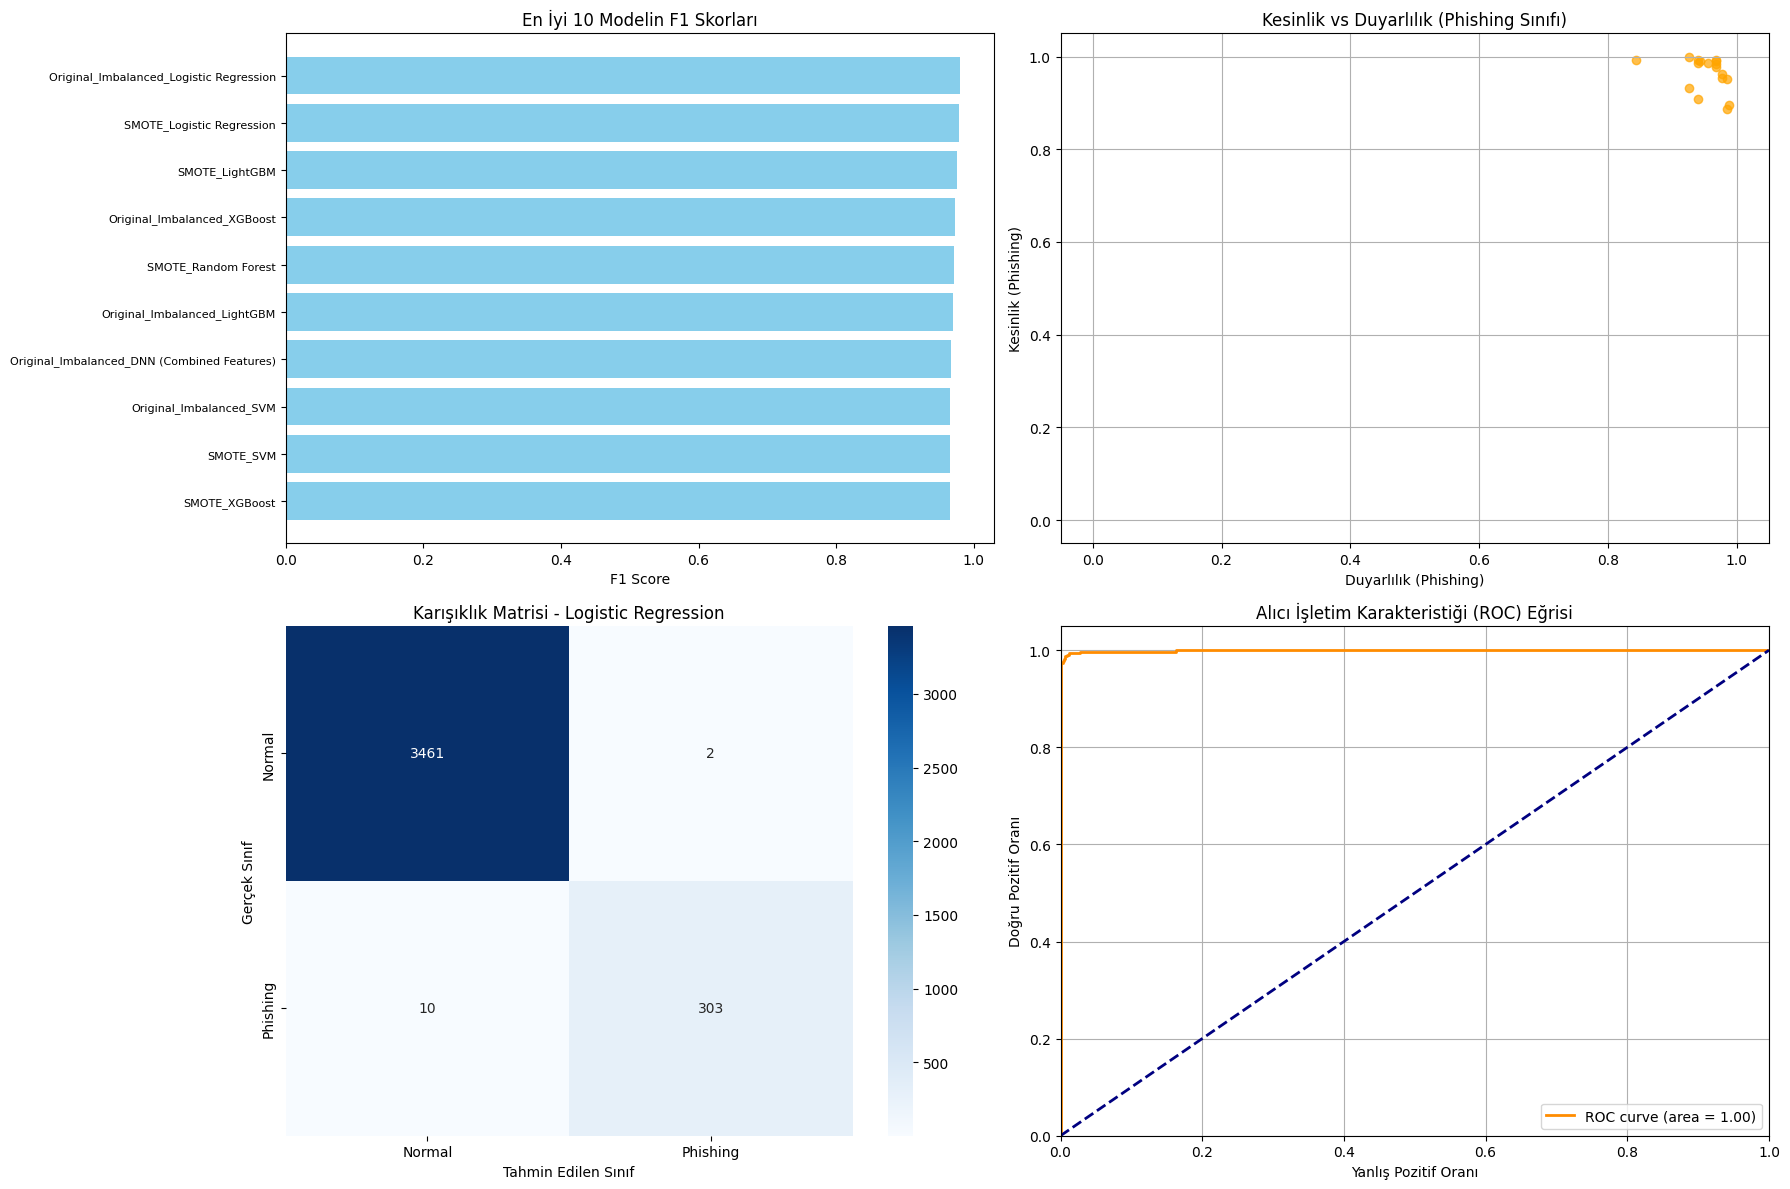


✅ Sonuç analizi ve görselleştirme tamamlandı.


In [ ]:
# =========================================================================
# Hücre 8: Sonuçları Analiz Et ve Görselleştir - HATA DÜZELTİLDİ
# =========================================================================
print("\n📊 DETAYLI SONUÇLAR ANALİZİ VE GÖRSELLEŞTİRME")
print("=" * 80)

if not all_results:
    print("Hiç model eğitilmedi veya değerlendirilmedi. Lütfen önceki adımları kontrol edin.")
else:
    # Sonuçları DataFrame'e çevir
    results_df = pd.DataFrame([
        {
            'Combination': key,
            'Balance_Strategy': result['balance_strategy'],
            'Model': result['model_name'], # 'Model' sütunu burada 'model_name' anahtarından alınıyor
            'Accuracy': result['accuracy'],
            'F1_Score': result['f1_score'],
            'AUC': result['auc'],
            'Precision_Phishing': result['precision_phishing'],
            'Recall_Phishing': result['recall_phishing']
        }
        for key, result in all_results.items()
    ])

    # F1 skora göre sırala (phishing tespiti için en önemli metrik)
    results_df = results_df.sort_values('F1_Score', ascending=False)

    print("🏆 EN İYİ KOMBİNASYONLAR (F1 Score'a göre sıralı):")
    print(results_df.to_string(index=False))

    # En iyi modeli al
    if best_combination_key and best_combination_key in all_results:
        best_result = all_results[best_combination_key]
        print(f"\n🥇 EN İYİ KOMBİNASYON: {best_combination_key}")
        print(f"  Dengeleme Stratejisi: {best_result['balance_strategy']}")
        print(f"  Model: {best_result['model_name']}") # 'model_name' kullanılıyor
        print(f"  F1 Score: {best_result['f1_score']:.4f}")
        print(f"  Accuracy: {best_result['accuracy']:.4f}")
        print(f"  AUC: {best_result['auc']:.4f}")
        print(f"  Phishing Precision: {best_result['precision_phishing']:.4f}")
        print(f"  Phishing Recall: {best_result['recall_phishing']:.4f}")

        # Detaylı classification report
        print(f"\n📋 EN İYİ MODEL - DETAYLI RAPOR:")
        print(classification_report(y_test, best_result['predictions'],
                                  target_names=['Normal', 'Phishing']))

        # GÖRSELLEŞTİRME
        plt.figure(figsize=(18, 12))

        # 1. F1 Skorları Çubuk Grafiği
        plt.subplot(2, 2, 1)
        top_n = min(10, len(results_df))
        top_results_plot = results_df.head(top_n)
        plt.barh(range(len(top_results_plot)), top_results_plot['F1_Score'], color='skyblue')
        plt.yticks(range(len(top_results_plot)), [f"{row['Balance_Strategy']}_{row['Model']}" for _, row in top_results_plot.iterrows()], fontsize=8)
        plt.xlabel('F1 Score')
        plt.title(f'En İyi {top_n} Modelin F1 Skorları')
        plt.gca().invert_yaxis()

        # 2. Precision vs Recall (Phishing Sınıfı) Scatter Plot
        plt.subplot(2, 2, 2)
        plt.scatter(results_df['Recall_Phishing'], results_df['Precision_Phishing'], alpha=0.7, color='orange')
        plt.xlabel('Duyarlılık (Phishing)')
        plt.ylabel('Kesinlik (Phishing)')
        plt.title('Kesinlik vs Duyarlılık (Phishing Sınıfı)')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.grid(True)

        # 3. En iyi modelin karışıklık matrisi
        plt.subplot(2, 2, 3)
        cm = confusion_matrix(y_test, best_result['predictions'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Normal', 'Phishing'],
                    yticklabels=['Normal', 'Phishing'])
        plt.title(f'Karışıklık Matrisi - {best_result["model_name"]}') # BURASI DÜZELTİLDİ!
        plt.xlabel('Tahmin Edilen Sınıf')
        plt.ylabel('Gerçek Sınıf')

        # 4. ROC Eğrisi (En iyi model)
        plt.subplot(2, 2, 4)
        fpr, tpr, _ = roc_curve(y_test, best_result['probabilities'])
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {best_result["auc"]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Yanlış Pozitif Oranı')
        plt.ylabel('Doğru Pozitif Oranı')
        plt.title('Alıcı İşletim Karakteristiği (ROC) Eğrisi')
        plt.legend(loc="lower right")
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    else:
        print("En iyi model bulunamadı veya sonuçları eksik.")

print("\n✅ Sonuç analizi ve görselleştirme tamamlandı.")

In [ ]:
# =========================================================================
# Hücre 9: En İyi Modeli ve Diğer Preprocessor Objeleri Disk'e Kaydet - GÜNCELLEDİ
# =========================================================================
import pickle

print("\n💾 En iyi model ve preprocessor objeleri kaydediliyor...")

if best_combination_key and best_combination_key in all_results:
    best_model_to_save = all_results[best_combination_key]['model_object']
    model_name_for_file = all_results[best_combination_key]['model_name'].replace(" ", "_").replace("(", "").replace(")", "")
    balance_strategy_for_file = all_results[best_combination_key]['balance_strategy'].replace(" ", "_")

    # En iyi modelin sınıflandırıcı objesini kaydet
    MODEL_SAVE_PATH = f"/content/drive/MyDrive/Bitirme_Projesi_Veriseti/best_phishing_detector_{balance_strategy_for_file}_{model_name_for_file}.pkl"
    with open(MODEL_SAVE_PATH, 'wb') as f:
        pickle.dump(best_model_to_save, f)
    print(f"✅ En iyi model ({best_model_to_save.__class__.__name__}) başarıyla kaydedildi: {MODEL_SAVE_PATH}")

    # TF-IDF vektörleyiciyi kaydet (Hücre 4'ten global tfidf objesi)
    TFIDF_SAVE_PATH = f"/content/drive/MyDrive/Bitirme_Projesi_Veriseti/tfidf_vectorizer.pkl"
    with open(TFIDF_SAVE_PATH, 'wb') as f:
        pickle.dump(tfidf, f) # tfidf objesi Hücre 4'te eğitilmiş olan
    print(f"✅ TF-IDF vektörleyici başarıyla kaydedildi: {TFIDF_SAVE_PATH}")

    # StandardScaler objesini kaydet (Hücre 5'ten global scaler objesi)
    SCALER_SAVE_PATH = f"/content/drive/MyDrive/Bitirme_Projesi_Veriseti/scaler.pkl"
    with open(SCALER_SAVE_PATH, 'wb') as f:
        pickle.dump(scaler, f) # scaler objesi Hücre 5'te eğitilmiş olan
    print(f"✅ StandardScaler başarıyla kaydedildi: {SCALER_SAVE_PATH}")

else:
    print("❌ Kaydedilecek bir 'en iyi model' bulunamadı.")

print("\n✅ Model ve preprocessor objeleri kaydetme işlemi tamamlandı.")


💾 En iyi model ve preprocessor objeleri kaydediliyor...
✅ En iyi model (LogisticRegression) başarıyla kaydedildi: /content/drive/MyDrive/Bitirme_Projesi_Veriseti/best_phishing_detector_Original_Imbalanced_Logistic_Regression.pkl
✅ TF-IDF vektörleyici başarıyla kaydedildi: /content/drive/MyDrive/Bitirme_Projesi_Veriseti/tfidf_vectorizer.pkl
✅ StandardScaler başarıyla kaydedildi: /content/drive/MyDrive/Bitirme_Projesi_Veriseti/scaler.pkl

✅ Model ve preprocessor objeleri kaydetme işlemi tamamlandı.


In [ ]:
# =========================================================================
# Hücre 9: En İyi Modeli Disk'e Kaydet - DÜZELTİLDİ
# =========================================================================
import pickle # BU SATIRI EKLE!

print("\n💾 En iyi model kaydediliyor...")

if best_combination_key and best_combination_key in all_results:
    best_model_to_save = all_results[best_combination_key]['model_object']
    model_name_for_file = all_results[best_combination_key]['model_name'].replace(" ", "_").replace("(", "").replace(")", "")
    balance_strategy_for_file = all_results[best_combination_key]['balance_strategy'].replace(" ", "_")

    # Dosya adı: dengeleme_stratejisi_model_adı.pkl
    SAVE_PATH = f"/content/drive/MyDrive/Bitirme_Projesi_Veriseti/best_phishing_detector_{balance_strategy_for_file}_{model_name_for_file}.pkl"

    try:
        with open(SAVE_PATH, 'wb') as f:
            pickle.dump(best_model_to_save, f)
        print(f"✅ En iyi model ({best_model_to_save.__class__.__name__}) başarıyla kaydedildi: {SAVE_PATH}")
    except Exception as e:
        print(f"❌ En iyi model kaydedilirken hata oluştu: {e}")
else:
    print("❌ Kaydedilecek bir 'en iyi model' bulunamadı. Lütfen önceki hücrelerin doğru çalıştığından emin olun.")

print("\n✅ Model kaydetme işlemi tamamlandı.")


💾 En iyi model kaydediliyor...
✅ En iyi model (LogisticRegression) başarıyla kaydedildi: /content/drive/MyDrive/Bitirme_Projesi_Veriseti/best_phishing_detector_Original_Imbalanced_Logistic_Regression.pkl

✅ Model kaydetme işlemi tamamlandı.
